In [ ]:
import tensorflow as tf
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imghdr
data_dir = os.path.join('/content', 'drive', 'MyDrive', 'Colab Notebooks',
                        'cell_segmentation_and_classifier', 'TRAIN')


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)


In [ ]:
tf.data.Dataset??

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 288 files belonging to 4 classes.


In [ ]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

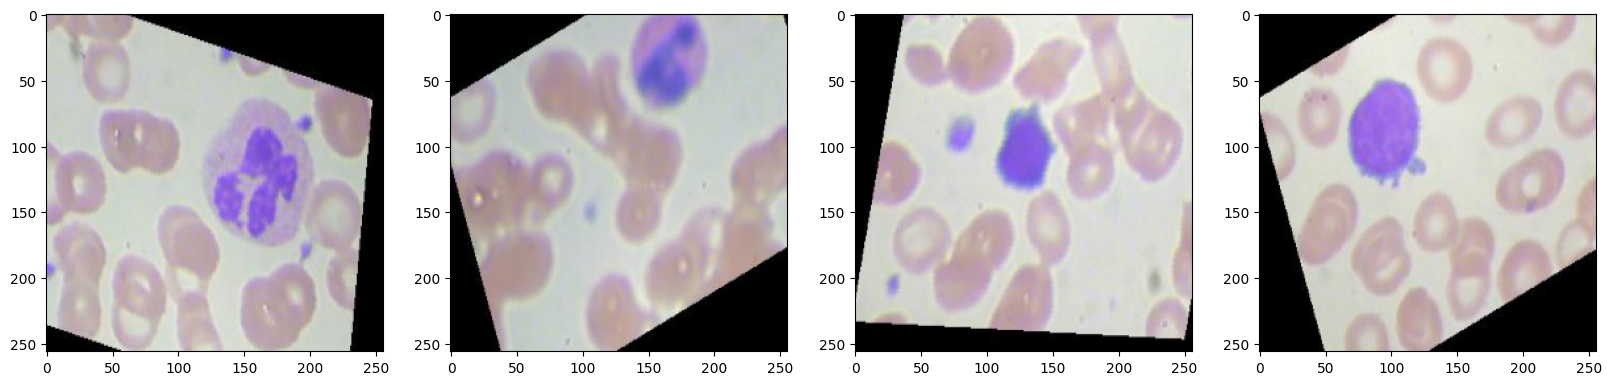

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)

In [ ]:
batch[0].max()

1.0

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir='logs'

In [ ]:
tensorboard_caallback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_caallback])

Epoch 1/20
6/6 [==============================] - 14s 2s/step - loss: 1.9708 - accuracy: 0.2500 - val_loss: 1.3875 - val_accuracy: 0.1250
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 1.3844 - accuracy: 0.2760 - val_loss: 1.3797 - val_accuracy: 0.2812
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 1.3715 - accuracy: 0.3073 - val_loss: 1.3391 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 13s 2s/step - loss: 1.3412 - accuracy: 0.5000 - val_loss: 1.2977 - val_accuracy: 0.5625
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: 1.2947 - accuracy: 0.4115 - val_loss: 1.2316 - val_accuracy: 0.3750
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 1.2464 - accuracy: 0.4062 - val_loss: 1.1537 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 1.1304 - accuracy: 0.5781 - val_loss: 1.0279 - val_accuracy: 0.4688
Epoch 8/20
6/6 [==================

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/cell_segmentation_and_classifier/TRAIN/NEUTROPHIL/_0_1095.jpeg'
img_ = cv2.imread(image_path)

In [ ]:
img_ = tf.image.resize(img_, (256,256))
np.expand_dims(img_, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(img_/255, 0))

1/1 [==============================] - 0s 35ms/step


In [ ]:
np.argmax(yhat)

3

In [ ]:
from joblib import dump, load

# Save the model
dump(model, '/content/drive/MyDrive/Colab Notebooks/Classifier.joblib')

['/content/drive/MyDrive/Colab Notebooks/Classifier.joblib']